# Principal Component Analysis

## Task 1
In this task, we will once again work with the MNIST training set as provided on Moodle. Choose three digit classes, e.g. 1, 2 and 3 and load `N=1000` images from each of the classes to the workspace. Store the data in a normalized matrix `X` of type `double` and size `(784,3*N)`. Furthermore, generate a color label matrix `C` of dimensions `(3*N,3)`. Each row of `C` assigns an RGB color vector to the respective column of X as an indicator of the digit class. Choose `[0, 0, 1].T`, `[0,1, 0]` and `[1, 0, 0]` for the three digit classes.

In [1]:
import numpy as np
import scipy.misc as scm

N=1000
digit_prefix=['d1','d2','d3']
X=np.zeros((784,3*N))
C=np.zeros((3*N,3))
for i,dp in enumerate(digit_prefix):
    val_rgb=np.zeros((3,))
    val_rgb[i]=1.0
    for j in range(N):
        X[:,i*N+j]=np.float64(scm.imread('mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())
        C[i*N+j]=val_rgb


a) Compute the row-wise mean `mu` of `X` and subtract it from each column of `X`. Save the results as `X_c`.

In [2]:
mu=np.mean(X,axis=1)
X_c=X-np.expand_dims(mu,axis=1) # expand dims to ensure correct broadcasting

b) Use `np.linalg.svd` with `full_matrices=False` to compute the singular value decomposition `[U,Sigma,VT]` of `X_c`

In [3]:
[U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)

c) Use `reshape` in order to convert `mu` and the first three columns of `U` to `(28,28)`-matrices. Plot the resulting images. What do you see?

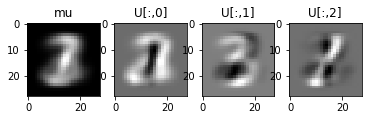

In [4]:
import matplotlib.pyplot as plt

plt.subplot(1,4,1)
plt.imshow(mu.reshape(28,28), cmap='gray')
plt.title('mu')
plt.subplot(1,4,2)
plt.imshow(U[:,0].reshape(28,28), cmap='gray')
plt.title('U[:,0]')
plt.subplot(1,4,3)
plt.imshow(U[:,1].reshape(28,28), cmap='gray')
plt.title('U[:,1]')
plt.subplot(1,4,4)
plt.imshow(U[:,2].reshape(28,28), cmap='gray')
plt.title('U[:,2]')
plt.show()

d) Compute the matrix `S=np.dot(np.diag(Sigma),V.T)`. Note that his yields the same result as `S=np.dot(U.T,X_c)`. The `S` matrix contains the `3*N` scores for the principal components `1` to `784`. Create a 2D scatter plot with `C` as its color parameter in order to plot the scores for the first two principal components of the data.

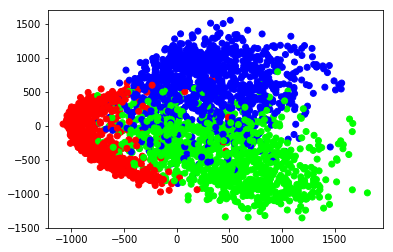

In [5]:
S=np.expand_dims(Sigma,axis=1)*VT

#reorder indexes for visualization purposes
idx_new=((np.arange(3*N).reshape(3,N).T).reshape(N,3)).ravel()
plt.scatter(S[0,idx_new],S[1,idx_new],c=C[idx_new])
plt.show()

## Task 2

In this task, we consider the problem of choosing the number of principal vectors. Assuming that $\mathbf{X} \in \mathbb{R}^{p \times N}$ is the centered data matrix and $\mathbf{P} = \mathbf{U}_k \mathbf{U}_k^\top$ is the projector onto the $k$-dimensional principal subspace, the dimension $k$ is chosen such that the fraction of overall energy contained in the projection error does not exceed $\epsilon$, i.e.\
	\begin{equation*}
	    \frac{\|\mathbf{X} - \mathbf{PX}\|_F^2}{\|\mathbf{X}\|_F^2} 
	    = \frac{\sum_{i=1}^{M} \|\mathbf{x}_i - \mathbf{Px}_i\|^2}{\sum_{i=1}^N \|\mathbf{x}_i\|^2} \leq \epsilon,
	\end{equation*}
where $\epsilon$ is usually chosen to be between 0.01 and 0.2.
	
The MIT VisTex database as provided on Moodle consists of a set of 167 RGB texture images of sizes `(512,512,3)`. Download the ZIP file, unpack it and make yourself familiar with the directory strucutre.

a) After preprocessing the entire image set (converting to normalized grayscale matrices), divide the images into non overlapping tiles of sizes `(64,64)` and create a centered data matrix `X_c` of size `(p,N)` from them, where `p=64*64` and `N=167*(512/64)*(512/64)`.

In [6]:
import os, glob

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

# define data directory
data_dir = './VisTex_512_512'

# change to correct directory
files = glob.glob(data_dir+'/*.ppm')

# define number of files
N = len(files)

p=64**2
n = np.uint16(N*512**2/p)


# initialize array to store data
X = np.zeros((p, n))
im_count = 0
# import texture data
for f in files:
    img = scm.imread(f)
    img = rgb2gray(np.array(img)/255.0)
    for k in range(0,8):
        for j in range(0,8):
            x_tmp = img[k*64:(k+1)*64, j*64:(j+1)*64].ravel()
            X[:,np.uint16(im_count*(512/64)**2 + k*8 + j)] = x_tmp
    im_count +=1

#%% center data
mu = np.mean(X, axis=1)
X_c = X - np.expand_dims(mu, 1)

b) Compute the SVD of `X_c` and make sure the output eigenvalues are sorted in descending order.

In [7]:
[U_vt,Sigma_vt,V_vt]=np.linalg.svd(X_c, full_matrices=False)

c) Plot the fraction of energy contained in the projection error for the principal subspace dimensions `0` to `p`. How many principal vectors do you need to retain 80%, 90%, 95% or 99% of the original data energy?

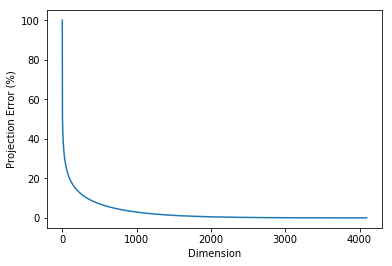

Required dimension of subspace for Preservation of 80% of the energy: 98.0
Required dimension of subspace for Preservation of 90% of the energy: 335.0
Required dimension of subspace for Preservation of 95% of the energy: 694.0
Required dimension of subspace for Preservation of 99% of the energy: 1651.0


In [8]:
p_steps=np.arange(p+1)
proj_error=np.array([(1.0-np.sum(Sigma_vt[:i]**2)/np.sum(Sigma_vt**2))*100.0 for i in p_steps])
plt.plot(p_steps,proj_error)
plt.xlabel('Dimension'); plt.ylabel('Projection Error (%)')
plt.show()

print('Required dimension of subspace for Preservation of 80% of the energy:', np.sum(np.uint16(proj_error>=20))+1)
print('Required dimension of subspace for Preservation of 90% of the energy:', np.sum(np.uint16(proj_error>=10))+1)
print('Required dimension of subspace for Preservation of 95% of the energy:', np.sum(np.uint16(proj_error>=5))+1)
print('Required dimension of subspace for Preservation of 99% of the energy:', np.sum(np.uint16(proj_error>=1))+1)

d) Discuss: Can you imagine a scenario, where energy is a bad measure of useful information?
    
A typical situation that arises with machine learning of natural images is that lighting conditions vary heavily. Often, the overall brightness of a picture does not add any discriminative value to it. For instance, a face recognition system should not care about whether a picture was taken at day or at night. However, if the overall brighness varies over a set of images that is processed by PCA, the first principal components will mostly contain the brightness information.